In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Before Data Preprocessing

In [2]:
!pip install pandas imbalanced-learn scikit-learn

In [3]:
# Import necessary libraries
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/creditcard_2023.csv")

# Display the first few rows of the dataset
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
df.shape

(568630, 31)

In [5]:
classes = df['Class'].value_counts()
classes

Class
0    284315
1    284315
Name: count, dtype: int64

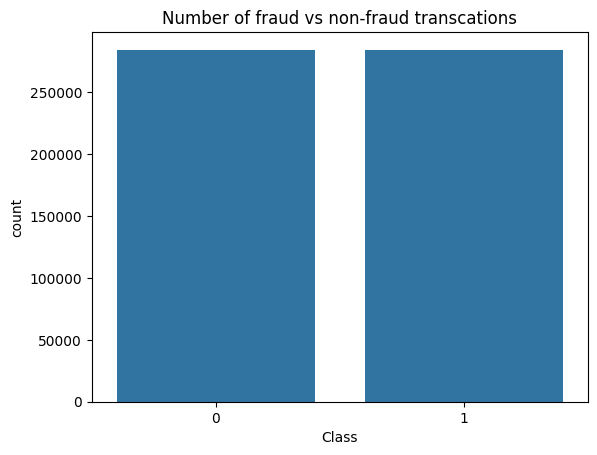

In [6]:
sns.countplot(x='Class', data=df)
plt.title('Number of fraud vs non-fraud transcations')
plt.show()

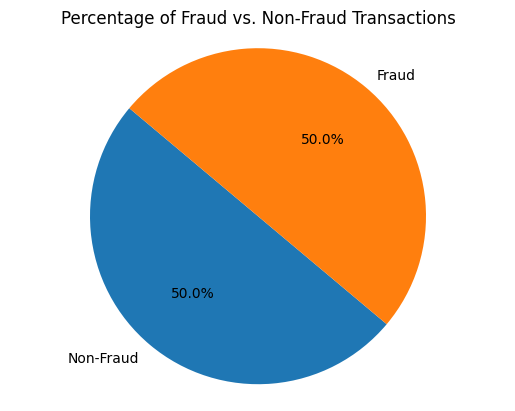

In [7]:
import matplotlib.pyplot as plt

# Calculate the counts of fraud and non-fraud transactions
fraud_counts = df['Class'].value_counts()
fraud_labels = ['Non-Fraud', 'Fraud']

# Plot the pie chart
plt.pie(fraud_counts, labels=fraud_labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Fraud vs. Non-Fraud Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [15]:
# Checking the correlation
corr = df.corr()

# View the correlation matrix interactively
corr


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,-0.395741,0.424267,-0.663655,0.617554,-0.268445,-0.387916,-0.414288,0.121282,-0.508427,...,0.097948,0.036106,0.017594,-0.116685,0.005586,0.052126,0.184195,0.086822,0.001710,0.864283
V1,-0.395741,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,0.424267,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,-0.663655,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,0.617554,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,-0.268445,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,-0.387916,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,-0.414288,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,0.121282,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,-0.508427,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522


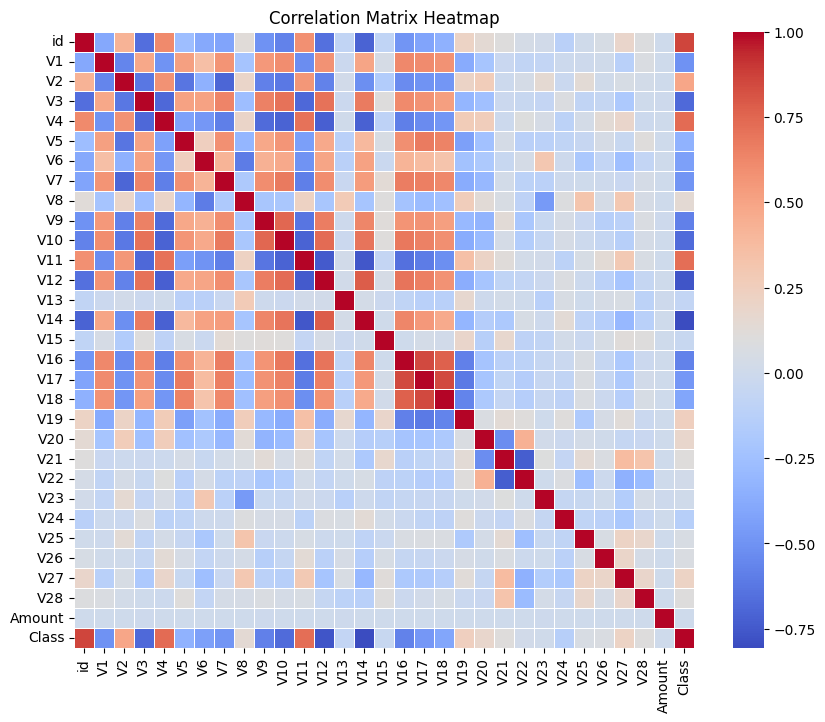

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking the correlation
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Handle missing values

In [21]:
# Cheking missing values in columns
df_missing_values = df.isnull().sum()
df_missing_values

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and it has the features you want to scale
features = df.columns  # or list of feature columns you want to scale
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Checking the first few rows of the scaled data
df_scaled.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.732048,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,-1.0
1,-1.732042,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,-1.0
2,-1.732036,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,-1.0
3,-1.732029,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,-1.0
4,-1.732023,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,-1.0


#### distribution of classes with amount

##### Analysis
We can see that the fraud transctions are mostly densed in the lower range of amount, whereas the non-fraud transctions are spreaded throughout low to high range of amount.

## Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'X' contains your features and 'y' contains your target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Scaling
We need to scale only the `Amount`,'Time' column as all other columns are already scaled by the PCA transformation.

# Models

In [31]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

In [32]:
results = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1-score', 'ROC'])

In [33]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

### Logistic regression

In [34]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [35]:
# Instantiate the model with best C
logistic = LogisticRegression(C=0.01)

In [36]:
# Fit the model on the train set
logistic_model = logistic.fit(X_train, y_train)

In [37]:
# Prepare results function
def display_test_results(model_name, model):

    # Prediction on the test set
    y_test_pred = model.predict(X_test)

    # Confusion matrix
    print("------------------ Confusion Matrix --------------------")
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)

    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()


    # classification_report
    print("------------------ classification_report --------------------")
    print(classification_report(y_test, y_test_pred))

    print("------------------ More Specific classification_report --------------------")
    TP = c_matrix[1,1] # true positive
    TN = c_matrix[0,0] # true negatives
    FP = c_matrix[0,1] # false positives
    FN = c_matrix[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Precision
    precision = TP / float(TP + FP)
    print("Precision:-", precision)

    # Recall
    recall = TP / float(TP + FN)
    print("Recall (Sensitivity):-", recall)

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # Predicted probability
    y_test_pred_proba = model.predict_proba(X_test)[:,1]

    # roc_auc
    print("------------------ ROC --------------------")
    roc_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

    # Plot the ROC curve
    draw_roc(y_test, y_test_pred_proba)

    # add all metrics score in final result store
    results.loc[len(results)] = [model_name, metrics.accuracy_score(y_test, y_test_pred), f1_score(y_test, y_test_pred), roc_auc]

    return None

#### Prediction results

------------------ Confusion Matrix --------------------


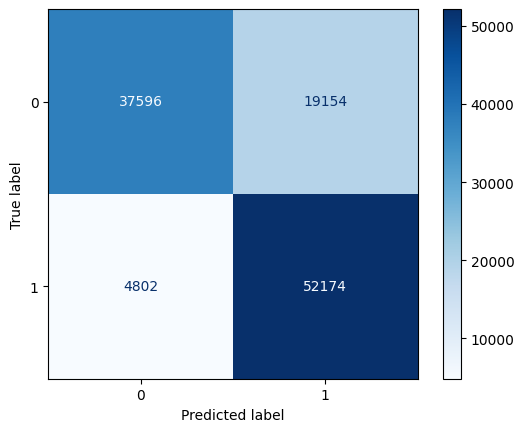

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       0.89      0.66      0.76     56750
           1       0.73      0.92      0.81     56976

    accuracy                           0.79    113726
   macro avg       0.81      0.79      0.79    113726
weighted avg       0.81      0.79      0.79    113726

------------------ More Specific classification_report --------------------
Accuracy:- 0.7893533580711535
Precision:- 0.7314659039928219
Recall (Sensitivity):- 0.915718899185622
F1-Score:- 0.8132871929168225
------------------ ROC --------------------


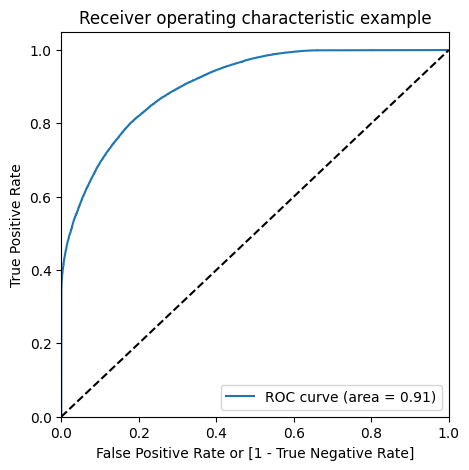

In [38]:
display_test_results("Logistic Regression", logistic_model)

We can see that we have very good ROC on the test set 0.98, which is almost close to 1.

### XGBoost

In [39]:
# Importing XGBoost
from xgboost import XGBClassifier

In [40]:
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}


In [41]:
# fit model on training data
xgb_model = XGBClassifier(params = params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

##### Prediction results

------------------ Confusion Matrix --------------------


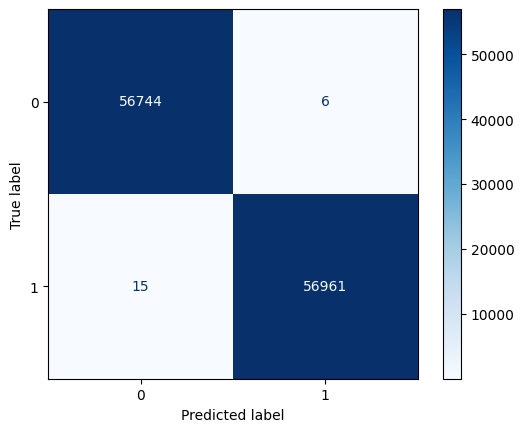

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

------------------ More Specific classification_report --------------------
Accuracy:- 0.999815345655347
Precision:- 0.9998946758649745
Recall (Sensitivity):- 0.9997367312552654
F1-Score:- 0.9998156973223454
------------------ ROC --------------------


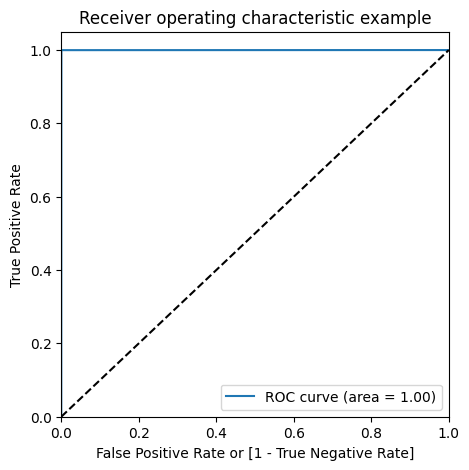

In [42]:
display_test_results("XG Boost", xgb_model)

### Decision Tree

In [43]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Model with optimal hyperparameters
decision_tree_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

##### Prediction results

------------------ Confusion Matrix --------------------


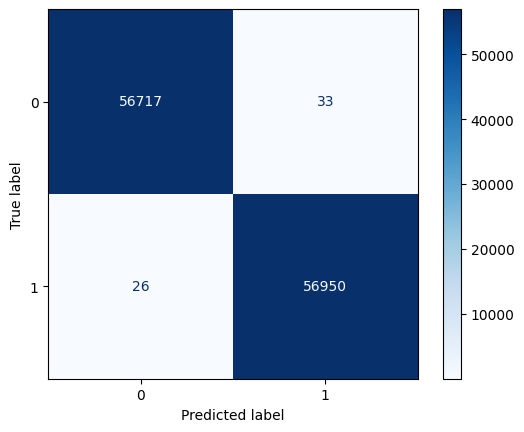

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

------------------ More Specific classification_report --------------------
Accuracy:- 0.9994812092221655
Precision:- 0.9994208799115526
Recall (Sensitivity):- 0.9995436675091266
F1-Score:- 0.9994822699391887
------------------ ROC --------------------


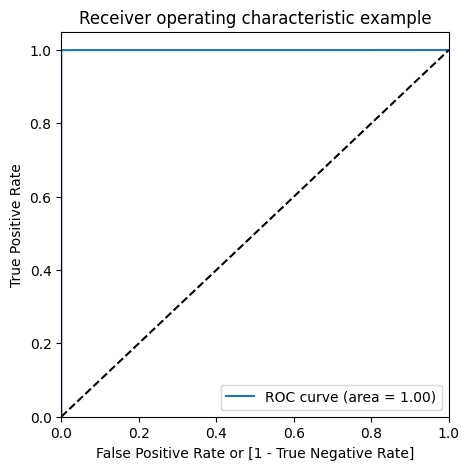

In [45]:
display_test_results("Decision Tree", decision_tree_model)

### Random forest

In [46]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
random_forest_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50,
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [48]:
# Fit the model
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

##### Prediction results

------------------ Confusion Matrix --------------------


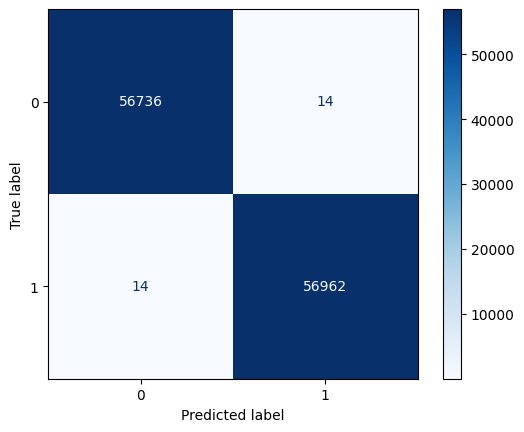

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

------------------ More Specific classification_report --------------------
Accuracy:- 0.9997537942071294
Precision:- 0.9997542825049144
Recall (Sensitivity):- 0.9997542825049144
F1-Score:- 0.9997542825049144
------------------ ROC --------------------


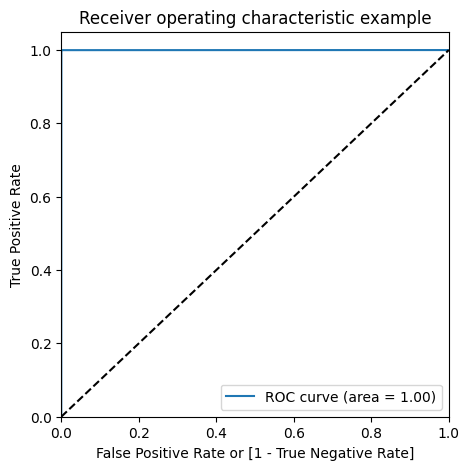

In [49]:
display_test_results("Random Forest", random_forest_model)

## Summary

In [50]:
results.sort_values(by="ROC", ascending=False)

,Model Name,Accuracy,F1-score,ROC
1,XG Boost,0.999815,0.999816,0.999987
3,Random Forest,0.999754,0.999754,0.999971
2,Decision Tree,0.999481,0.999482,0.999941
0,Logistic Regression,0.789353,0.813287,0.906457
